### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = '/Users/timovic/Desktop/Climate Analysis - battle station/02 Data'

In [4]:
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'all_merged.pkl'))

### 2. Data cleaning

In [5]:
df.head()

,country,year,hdi,gni,co2_consumption,happiness,hdi_groups,undp_regions,happiness category
0,Afghanistan,1990,0.273,2684.550019,NaN,NaN,Low,SA,NaN
1,Afghanistan,1991,0.279,2276.289409,NaN,NaN,Low,SA,NaN
2,Afghanistan,1992,0.287,2059.868084,NaN,NaN,Low,SA,NaN
3,Afghanistan,1993,0.297,1525.533426,NaN,NaN,Low,SA,NaN
4,Afghanistan,1994,0.292,1087.961890,NaN,NaN,Low,SA,NaN


In [6]:
df.shape

(6045, 9)

In [7]:
df.isnull().sum()

country                  0
year                     0
hdi                    665
gni                    130
co2_consumption       2501
happiness             5259
hdi_groups             124
undp_regions          1364
happiness category    5259
dtype: int64

In [8]:
# Dropping null rows in the 'gni' and 'hdi' columns, which I will use for the regression analysis below

df2 = df.dropna(subset=['hdi', 'gni'])

In [9]:
df2.shape

(5380, 9)

In [10]:
df2.dtypes

country                object
year                    int64
hdi                   float64
gni                   float64
co2_consumption       float64
happiness             float64
hdi_groups             object
undp_regions           object
happiness category     object
dtype: object

In [11]:
# Checking for duplicates

dups = df2.duplicated()

In [12]:
dups.shape

(5380,)

### 3. Preparing for regression analysis

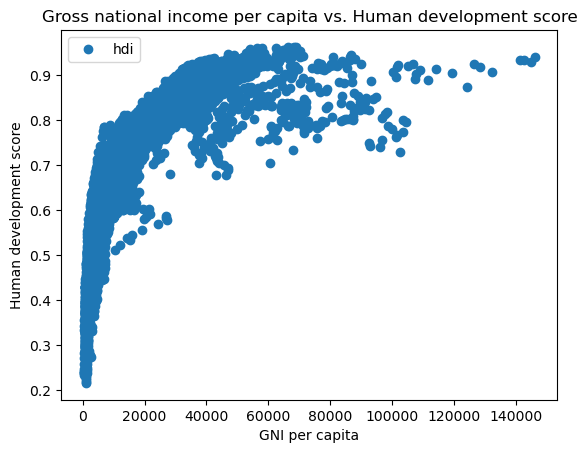

In [13]:
# Create scatterplot

df.plot(x = 'gni', y = 'hdi', style = 'o')
plt.title('Gross national income per capita vs. Human development score')
plt.xlabel('GNI per capita')
plt.ylabel('Human development score')
plt.show()

In [14]:
# Create and separate NumPy arrays

X = df2['gni'].values.reshape(-1,1)
y = df2['hdi'].values.reshape(-1,1)

In [15]:
X

array([[2684.550019],
       [2276.289409],
       [2059.868084],
       ...,
       [3864.012419],
       [3674.564482],
       [3654.289051]])

In [16]:
y

array([[0.273],
       [0.279],
       [0.287],
       ...,
       [0.602],
       [0.601],
       [0.6  ]])

In [17]:
# Converting X to log due to right tail

X = np.log(X)

In [18]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Conducting regression analysis

In [19]:
# Create regression object

regression = LinearRegression()

In [20]:
# Fit the regression object on the training set

regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict y values using X

y_predicted = regression.predict(X_test)

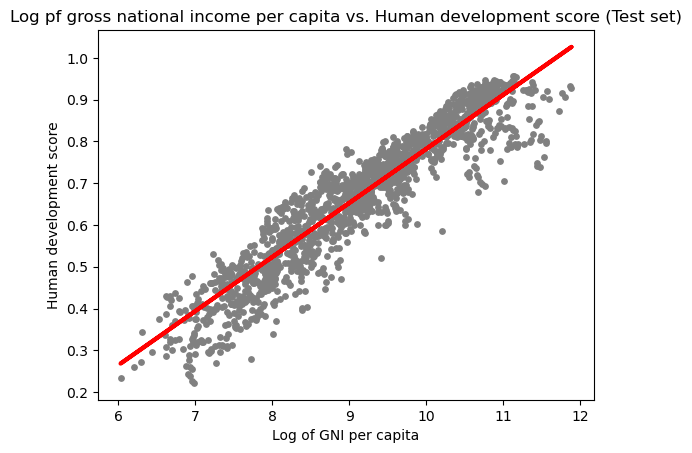

In [22]:
# Plot model regression line

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Log pf gross national income per capita vs. Human development score (Test set)')
plot_test.xlabel('Log of GNI per capita')
plot_test.ylabel('Human development score')
plot_test.show()

In [23]:
# Create objects to surface model summary statistics: Mean squared error and R2 score

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [24]:
# Display the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.12949367]]
Mean squared error:  0.003473477594149915
R2 score:  0.8732499147896994


We see a positive coefficient here. Using the log of GNI, there is only small squared error at 0.003. We also see a very good R2 score of 0.87, indicating that the model is good.

In [25]:
y_predicted

array([[0.52150764],
       [0.62665957],
       [0.56242595],
       ...,
       [0.9301313 ],
       [0.91461702],
       [0.93098997]])

In [26]:
data = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(25)

,Actual,Predicted
0,0.468,0.521508
1,0.660,0.626660
2,0.596,0.562426
3,0.690,0.672143
4,0.715,0.667925
5,0.871,0.861805
6,0.856,0.820183
7,0.610,0.551472
8,0.431,0.345274
9,0.765,0.802760


As expected, we can observe differences between predicted and actual values.

In [27]:
# Predict X_train to compare regression to the training set 

y_predicted_train = regression.predict(X_train)

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.12949367]]
Mean squared error:  0.0033050994815856972
R2 score:  0.8776941961864243


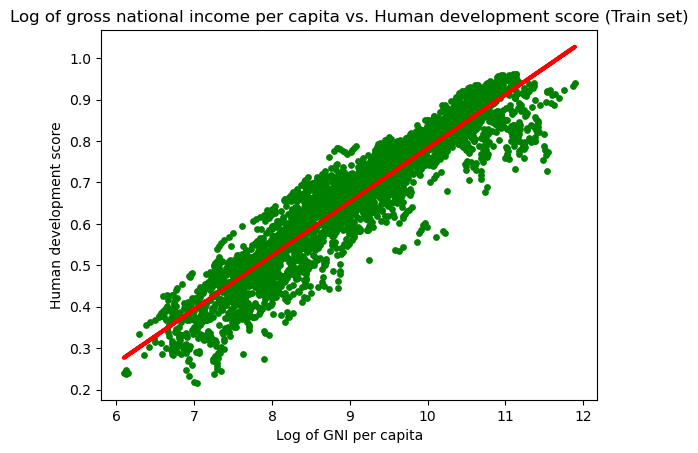

In [30]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Log of gross national income per capita vs. Human development score (Train set)')
plot_test.xlabel('Log of GNI per capita')
plot_test.ylabel('Human development score')
plot_test.show()

The model fits the training set nearly identically than the test set (0.87 vs 0.88), meaning that the is no model overfit. Using the GNI's log, the linear regression reflects the relationship between GNI and HDI relatively accurately (you may recall that the two variables showed a strong correlation of 0.74).

Data bias in this dataset is not a major concern, as both GNI and HDI measurements are based on internationally agreed standards. One could of course argue that these are Western dominated measurements, and would most probably not be universally accepted around the globe as accurate indicators worth striving towards.